<div class="markdown-google-sans">

# <strong>Bosch Assessment</strong>

## <strong>Overview</strong>
</div>

The objective is to perform a thorough analysis of this data and build a machine learning model to predict a target variable (price).

<div class="markdown-google-sans">
  <h3>Packages Installation</h3>
</div>

In [57]:
%pip install ucimlrepo
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<div class="markdown-google-sans">
  <h3>Imports</h3>
</div>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List

<div class="markdown-google-sans">

## <strong>Exploratory Data Analysis (EDA)</strong>
</div>

Conduct a thorough exploratory data analysis. 

This should include understanding the distribution of data, detecting outliers, and exploring relationships between features. 

Visualize important features and correlations.

In [86]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

automobile_df_og = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header = None, names = headers, na_values = "?")
automobile_df_og.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<div class="markdown-google-sans">
  <h2>Missing Values</h2>
</div>

Observation: There are NaN values.

Question: How many entries with NaN values?

Follow up: If few rows -> remove them.

In [87]:
print("Number of rows: ", len(automobile_df_og.index))
print("Number of rows with NaN values: ", automobile_df_og.isna().any(axis=1).sum())
print("Number of NaNs per column: \n", automobile_df_og.isna().sum())

Number of rows:  205
Number of rows with NaN values:  46
Number of NaNs per column: 
 symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


Obsevation: 41 rows do not have normalized losses (20% of the rows).

Follow up: If I had no restriction on time I would try to predict the missing values taking in consideration the values from other columns. A simple approach could be to replace it with the columns mean but that could introduce error on Price prediction, that being said, I will drop this column, being aware that it could decrease the accuracy of the final model.

In [88]:
automobile_df_wt_nans = automobile_df_og.drop(['normalized_losses'], axis=1)
print("Number of rows: ", len(automobile_df_wt_nans.index))
print("Number of rows with NaN values: ", automobile_df_wt_nans.isna().any(axis=1).sum())
print("Number of NaNs per column: \n", automobile_df_wt_nans.isna().sum())

Number of rows:  205
Number of rows with NaN values:  12
Number of NaNs per column: 
 symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64


Obsevation: Now only 12 rows have missing values (5% of the rows), and therefore, can be removed.

Follow up: Drop NaNs.

In [89]:
automobile_df_wt_nans = automobile_df_wt_nans.dropna()
print("Number of rows: ", len(automobile_df_wt_nans.index))
print("Number of rows with NaN values: ", automobile_df_wt_nans.isna().any(axis=1).sum())
print("Number of NaNs per column: \n", automobile_df_wt_nans.isna().sum())

Number of rows:  193
Number of rows with NaN values:  0
Number of NaNs per column: 
 symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


<div class="markdown-google-sans">
  <h2>Data Distribution</h2>
</div>

In [64]:
automobile_df_wt_nans.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

Observation: Categorical fatures will need encoding.

Follow up: Encode categorical features (next section).

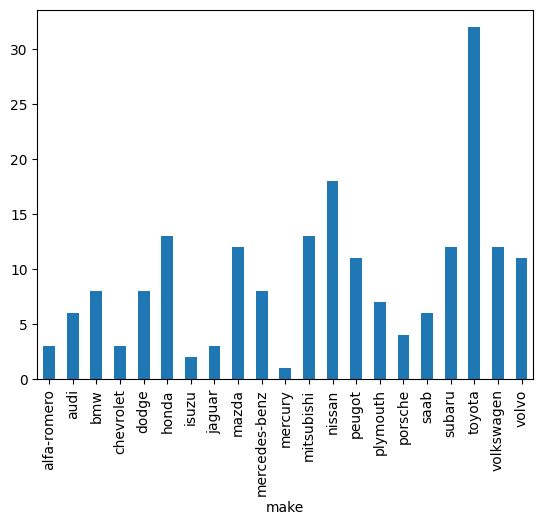

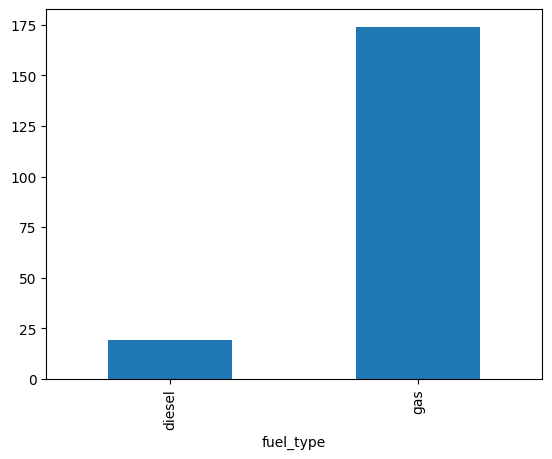

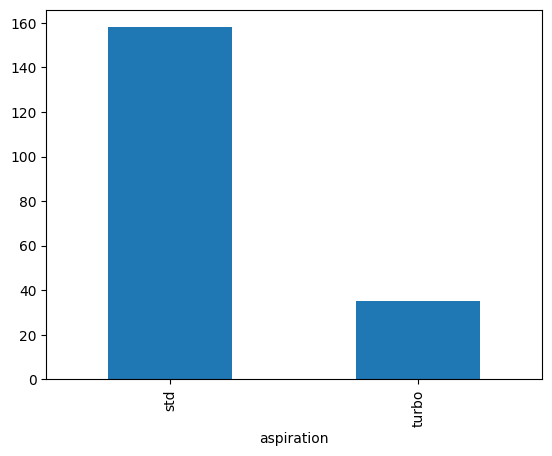

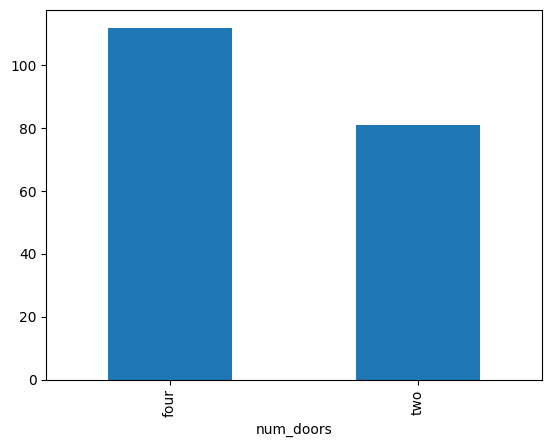

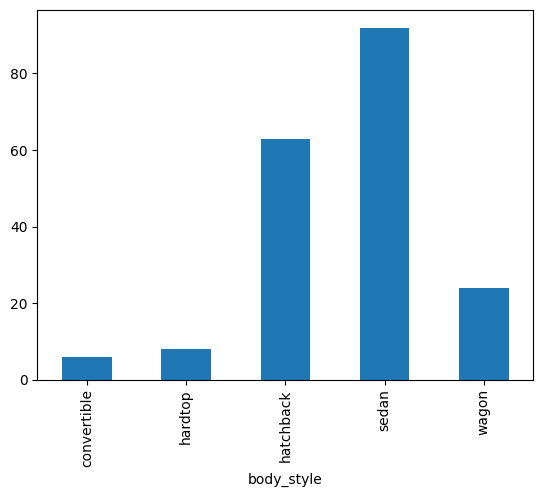

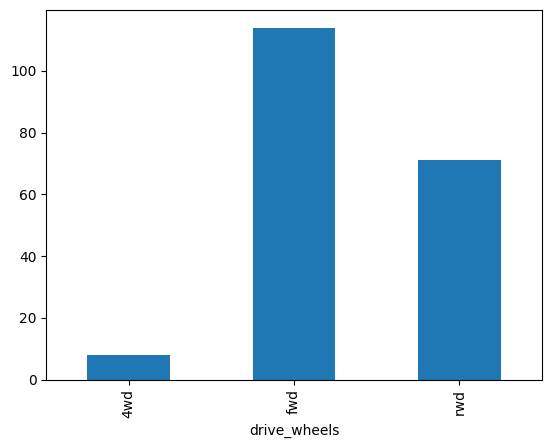

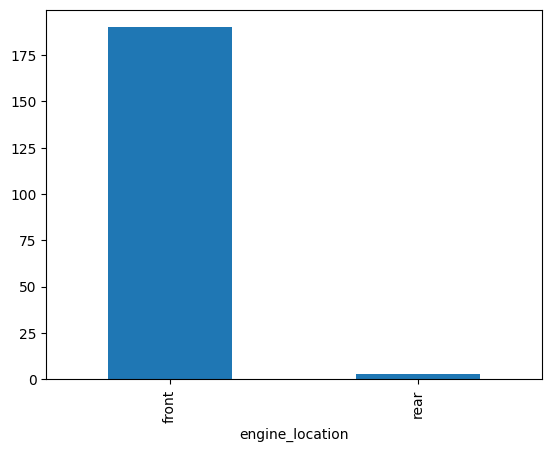

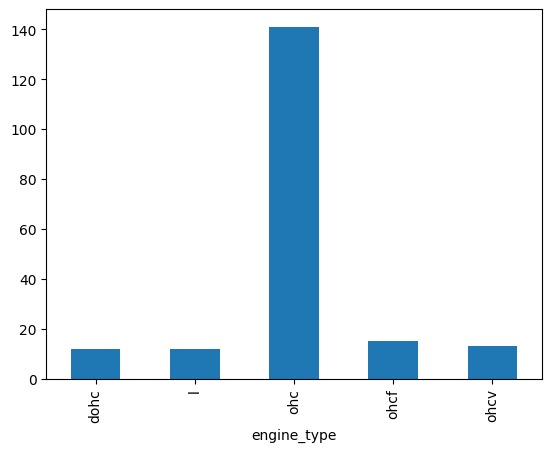

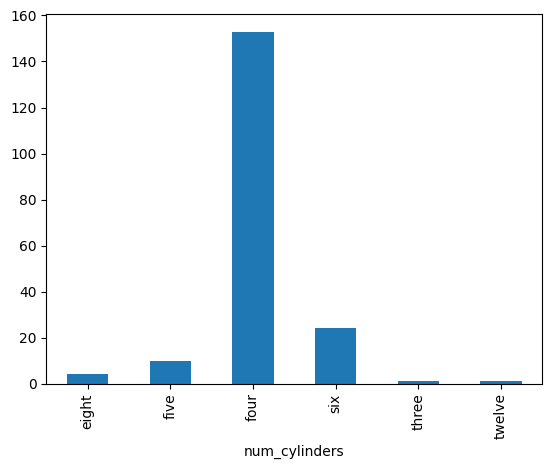

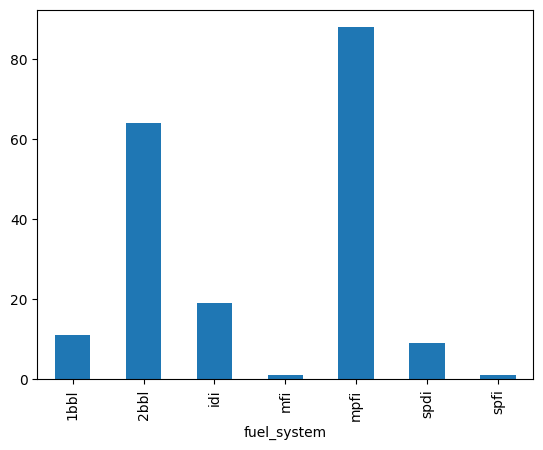

In [63]:
automobile_df_cat_vars_df = automobile_df_wt_nans.select_dtypes(include=['object']).copy()

for cat in automobile_df_cat_vars_df.columns:
    grouped_data = automobile_df_cat_vars_df.groupby(by = cat).size()
    grouped_data.plot.bar()
    plt.show()

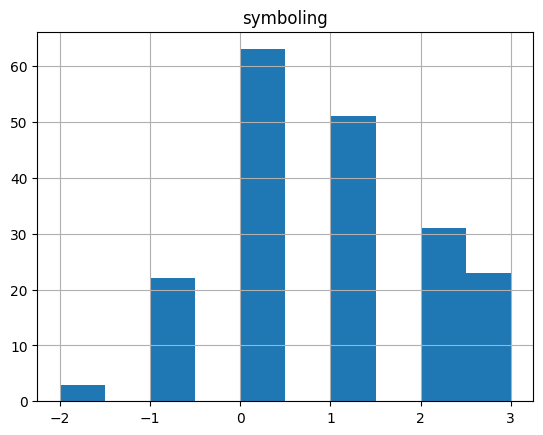

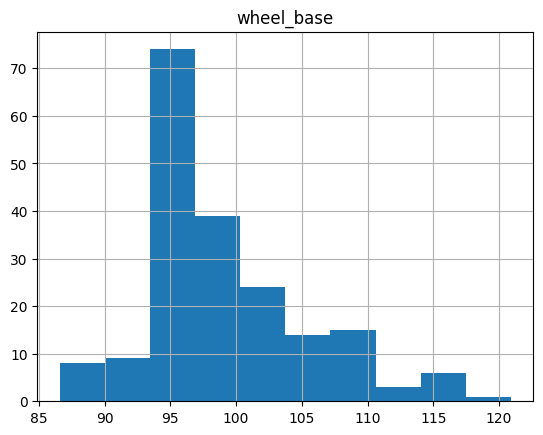

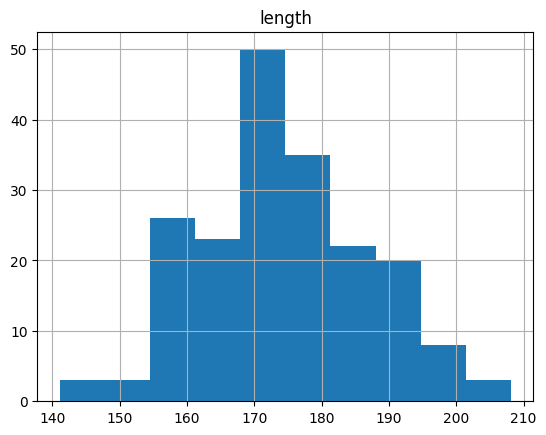

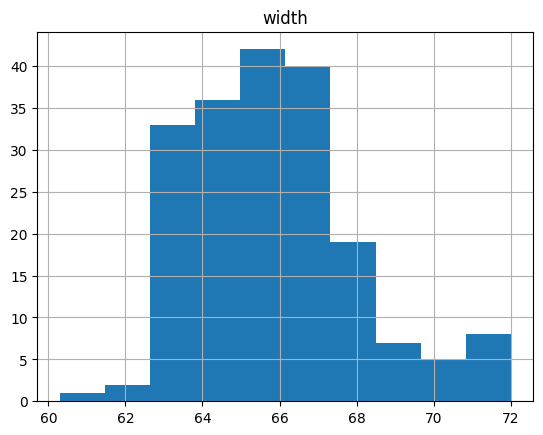

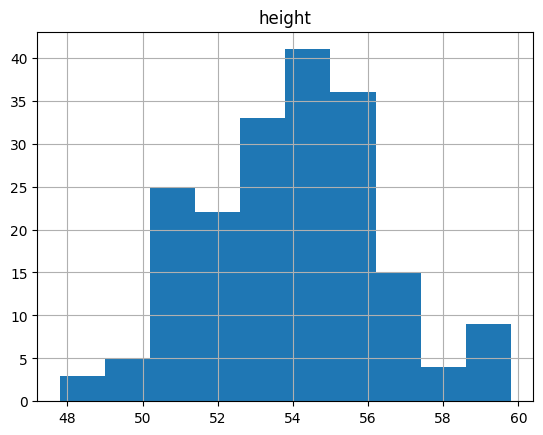

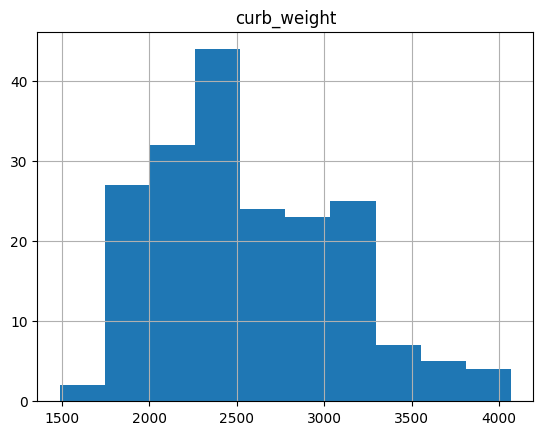

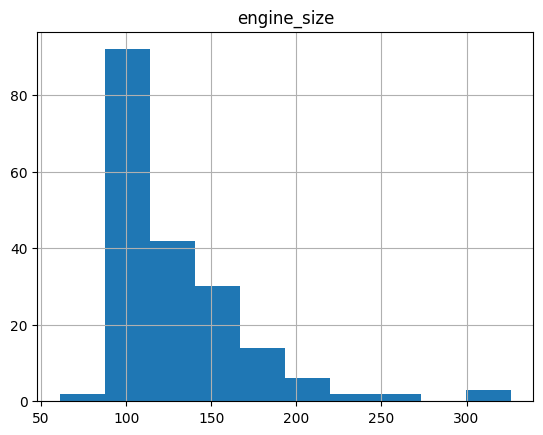

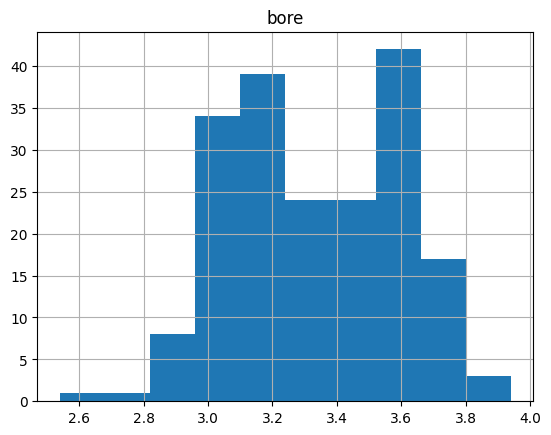

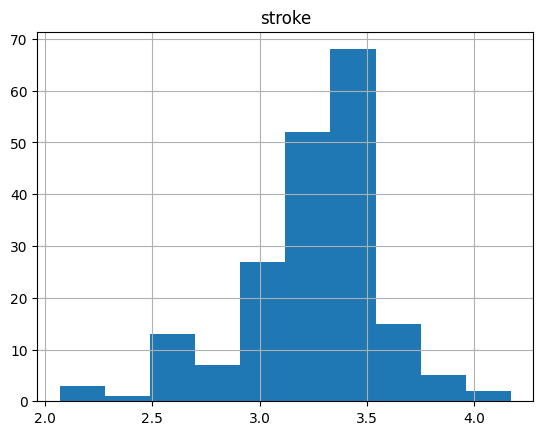

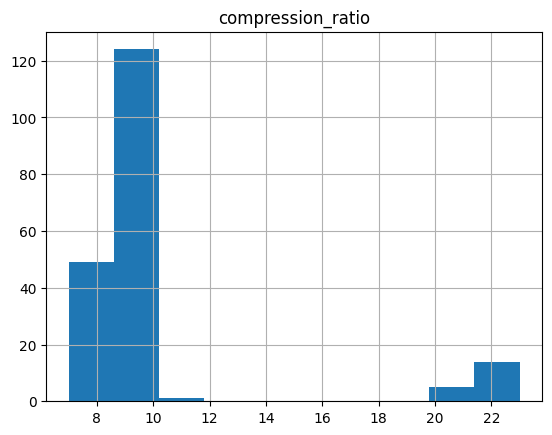

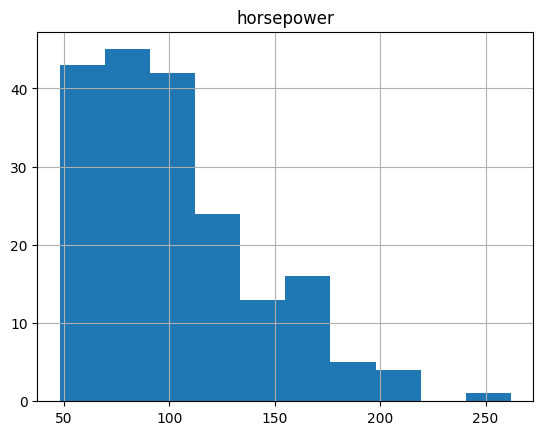

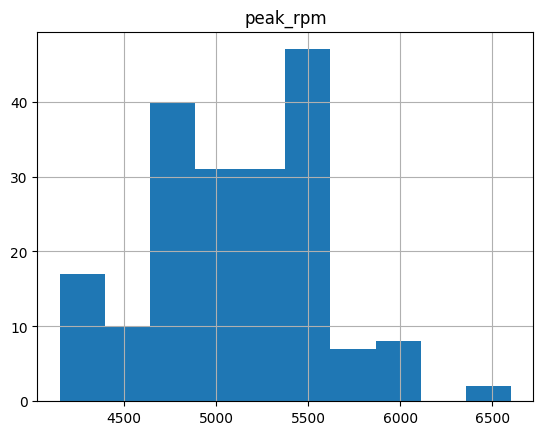

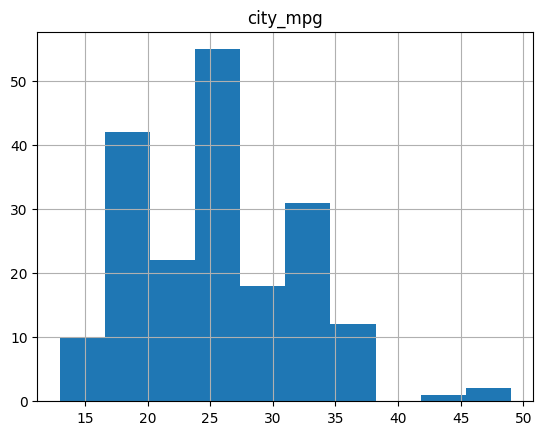

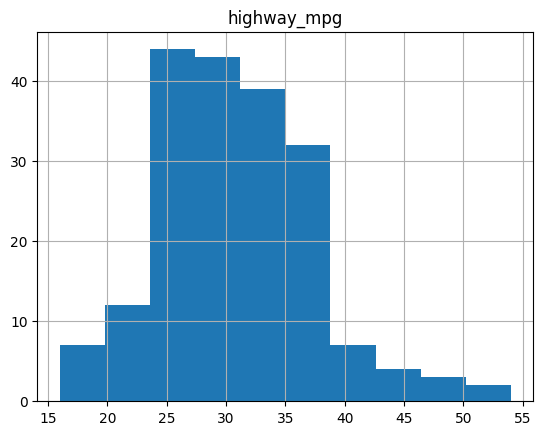

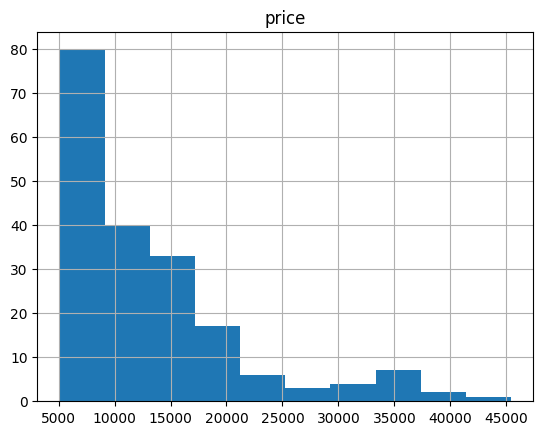

In [65]:
automobile_df_num_vars_df = automobile_df_wt_nans.select_dtypes(include=['int64', 'float64']).copy()

for var in automobile_df_num_vars_df.columns:
    automobile_df_num_vars_df.hist(column=var)
    plt.show()

<div class="markdown-google-sans">
  <h2>Categorical Variables Encoding</h2>
</div>

Observation: Number of doors and number of cylinders are represented by words, so those two features can be easly encoded.

Follow up: Encode number of doors and number of cylinders with their number representation.

In [52]:
replacements = {"num_doors":     {"two": 2, "four": 4},
                "num_cylinders": {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}}
automobile_df_cat_var_enc = automobile_df_wt_nans.replace(replacements)
automobile_df_cat_var_enc.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_doors              int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders          int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

Observation: The remaining categorical variables cannot be replaced. If we replaced 'fuel_system' by numbers like  {"1bbl": 1, "2bbl": 2, "4bbl": 3, "idi": 4, "mfi": 5, "mpfi": 6, "spdi": 7, "spfi": 8} we could be wrongly be teaching the model that there is some rank for that variable. Moreover, some features have only two possible values, so a simple approach could be to replaced it with binary values, however, that could not be scalable if more possibles values would to be added. Therefore, the remaining variables will be encoded using one-hot encoding.

Follow up: Use one hot enconding on remaining categorical variables.

In [53]:
categorical_columns = ["make", "fuel_type", "aspiration", "body_style", "drive_wheels", "engine_location", "engine_type", "fuel_system"]
automobile_df_cat_var_enc = pd.get_dummies(automobile_df_cat_var_enc.copy(), columns = categorical_columns)
automobile_df_cat_var_enc.dtypes

symboling             int64
num_doors             int64
wheel_base          float64
length              float64
width               float64
                     ...   
fuel_system_idi        bool
fuel_system_mfi        bool
fuel_system_mpfi       bool
fuel_system_spdi       bool
fuel_system_spfi       bool
Length: 64, dtype: object

<div class="markdown-google-sans">
  <h2>Outlier Removal</h2>
</div>

Starting by drawing the box plots to see in which variables we can observe points outside of the inter quartile region. 

Secondly drawing the scatter plot for each pair of independent/dependent variable, allowing us to also detect outliers while already detecting relationships between variables.

Excluding the hot encoded variables since there are only two possible values.

Analysing variable:  symboling


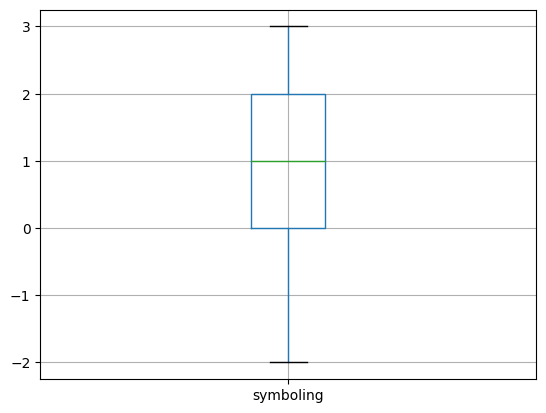

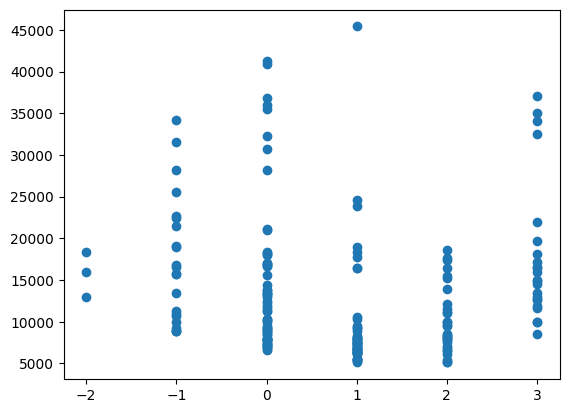

---------------------------------------------------------------------------------------- 

Analysing variable:  num_doors


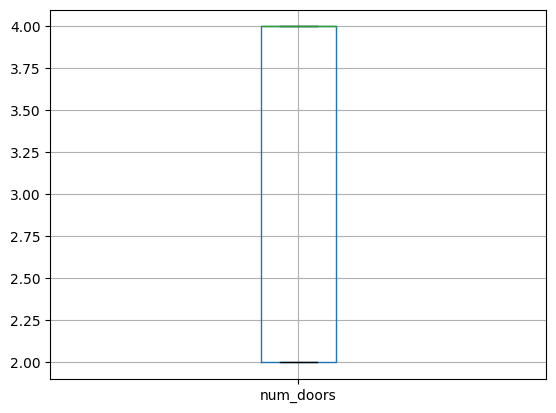

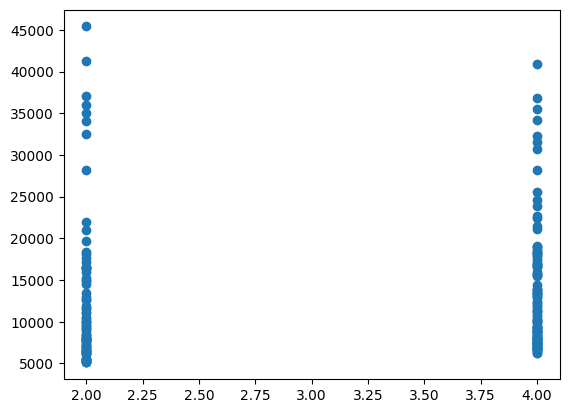

---------------------------------------------------------------------------------------- 

Analysing variable:  wheel_base


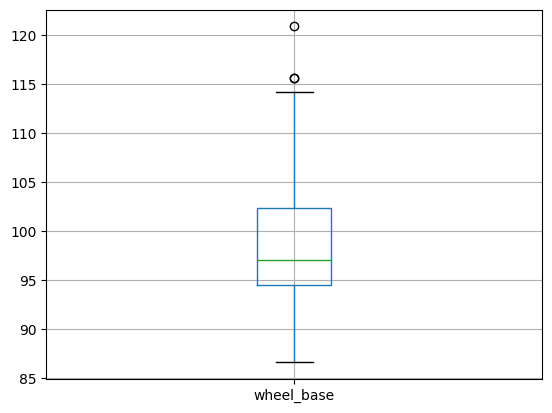

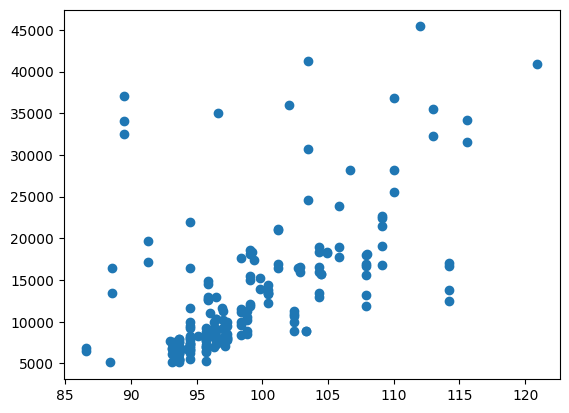

---------------------------------------------------------------------------------------- 

Analysing variable:  length


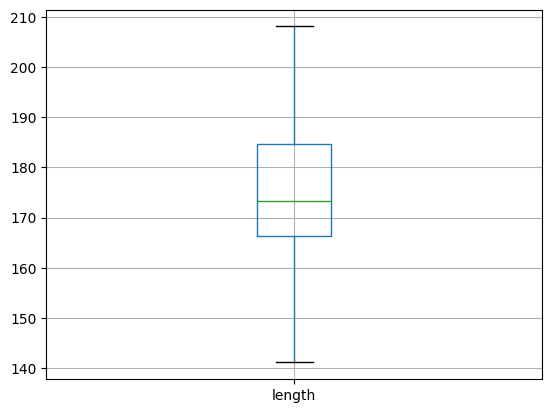

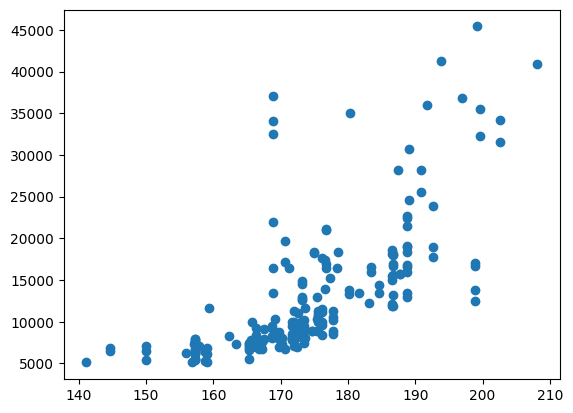

---------------------------------------------------------------------------------------- 

Analysing variable:  width


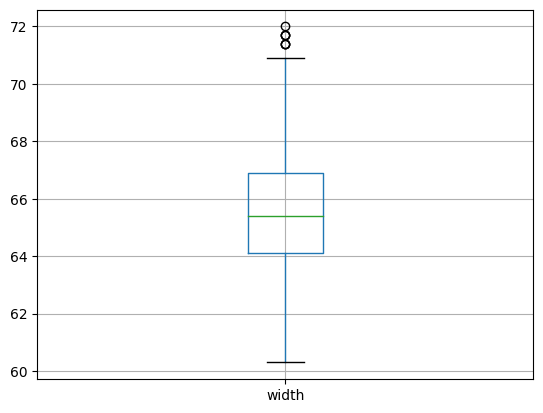

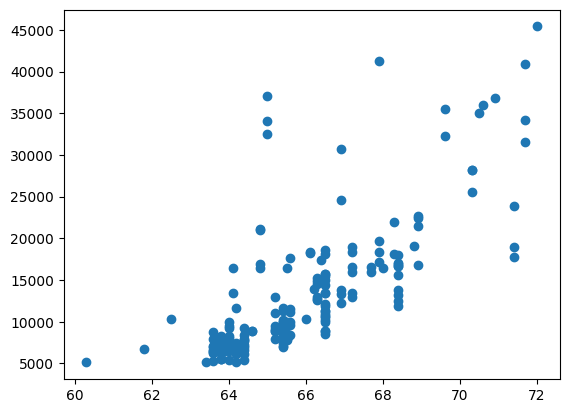

---------------------------------------------------------------------------------------- 

Analysing variable:  height


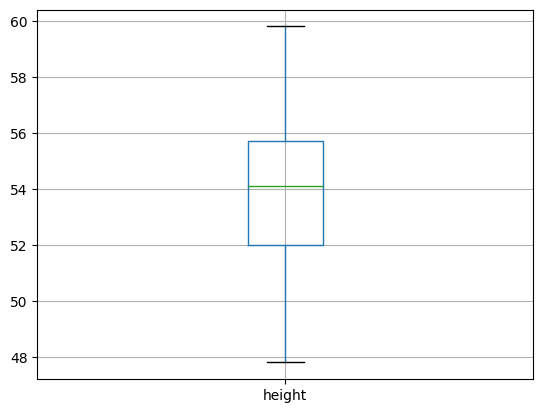

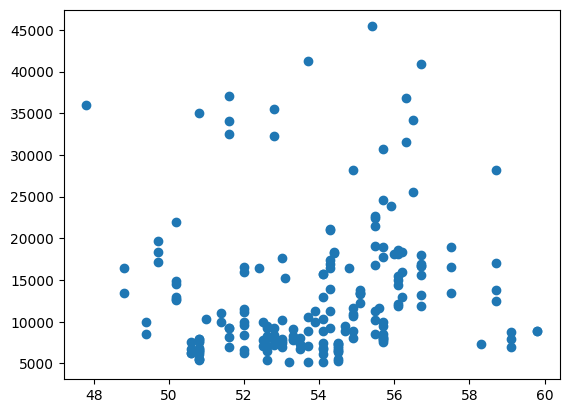

---------------------------------------------------------------------------------------- 

Analysing variable:  curb_weight


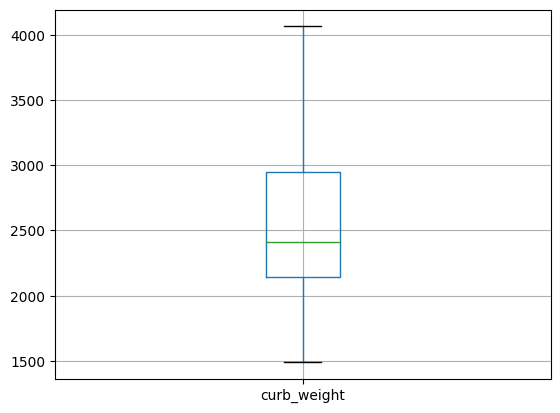

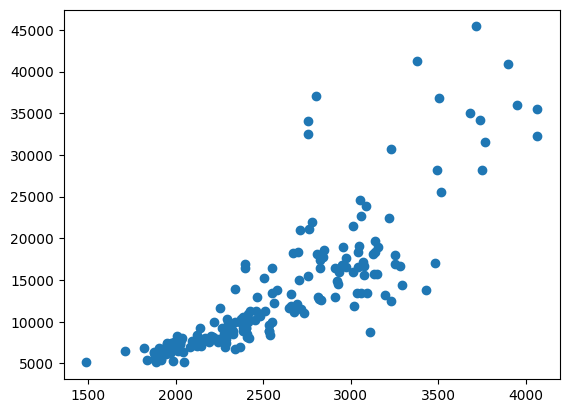

---------------------------------------------------------------------------------------- 

Analysing variable:  num_cylinders


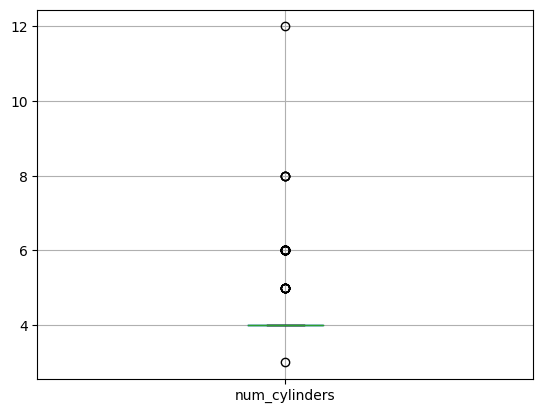

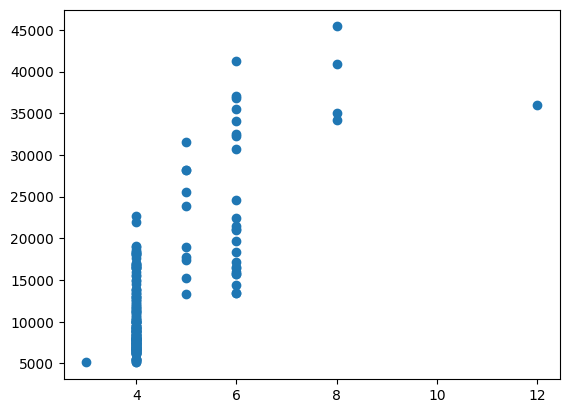

---------------------------------------------------------------------------------------- 

Analysing variable:  engine_size


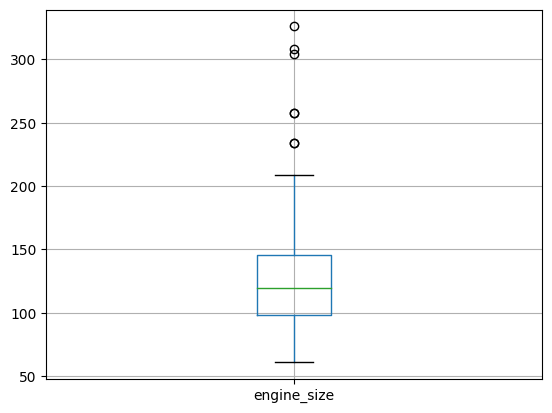

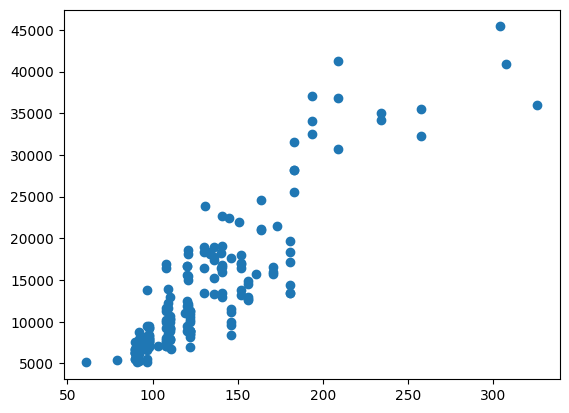

---------------------------------------------------------------------------------------- 

Analysing variable:  bore


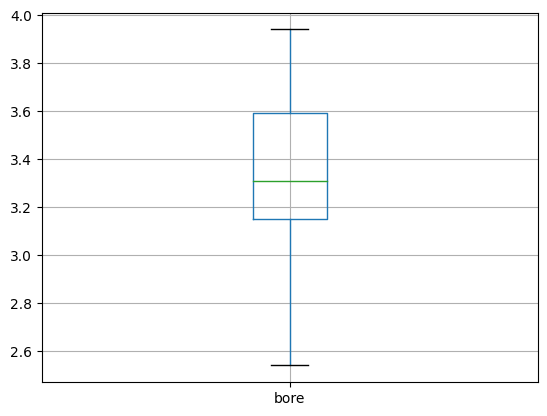

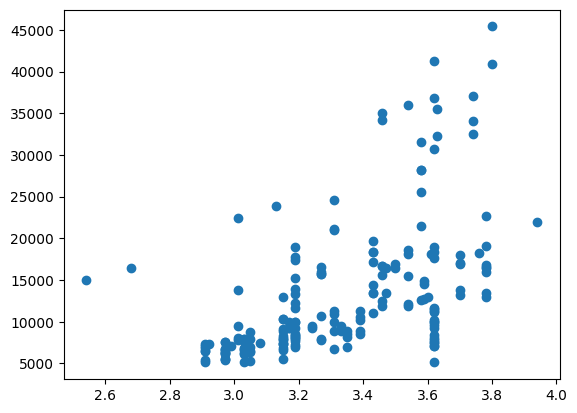

---------------------------------------------------------------------------------------- 

Analysing variable:  stroke


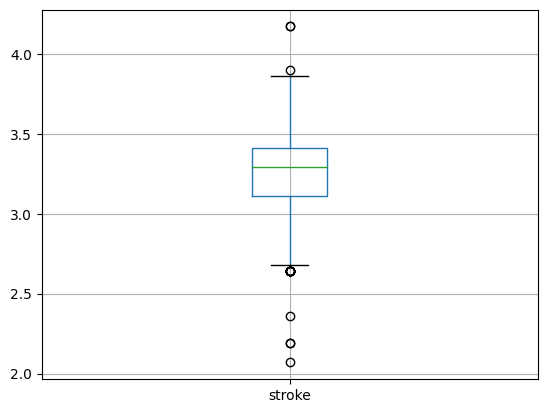

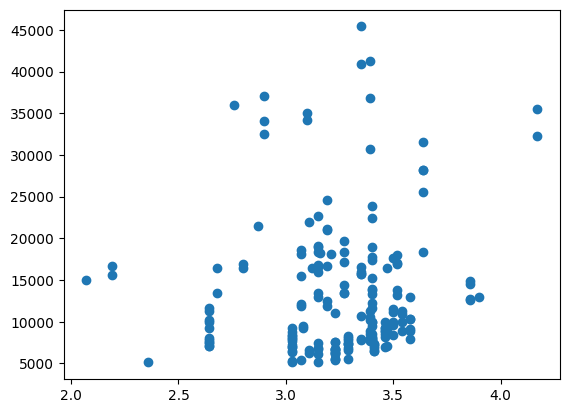

---------------------------------------------------------------------------------------- 

Analysing variable:  compression_ratio


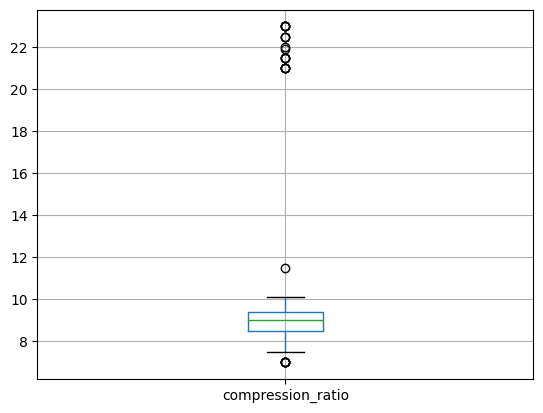

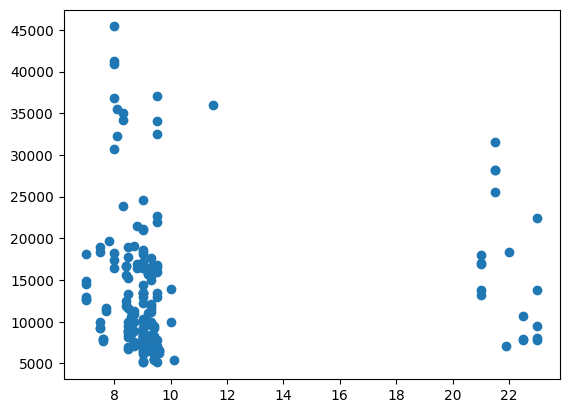

---------------------------------------------------------------------------------------- 

Analysing variable:  horsepower


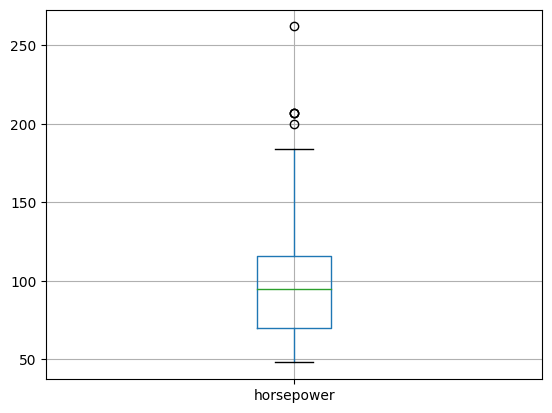

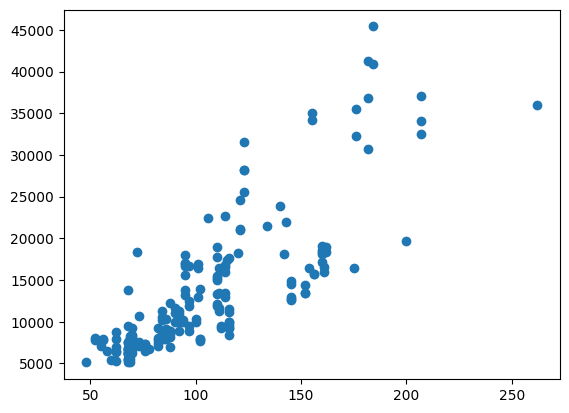

---------------------------------------------------------------------------------------- 

Analysing variable:  peak_rpm


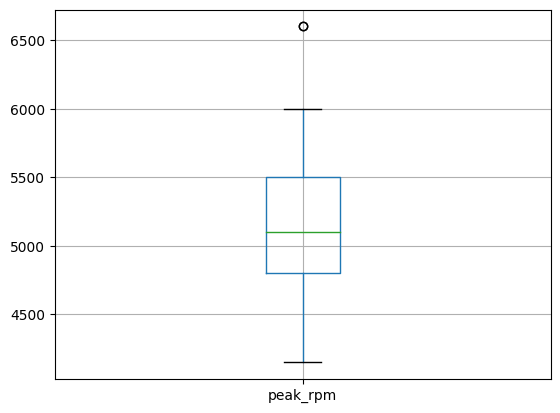

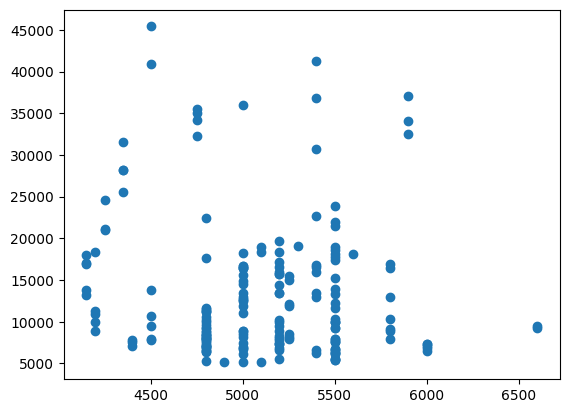

---------------------------------------------------------------------------------------- 

Analysing variable:  city_mpg


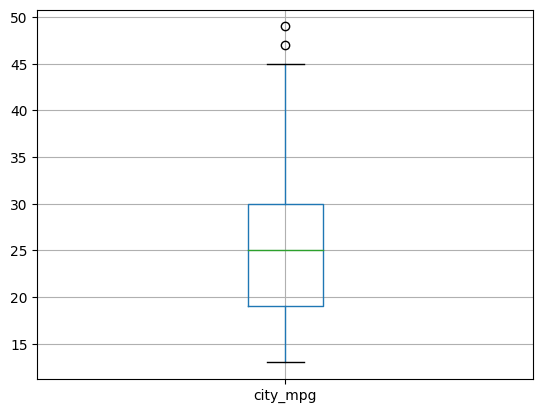

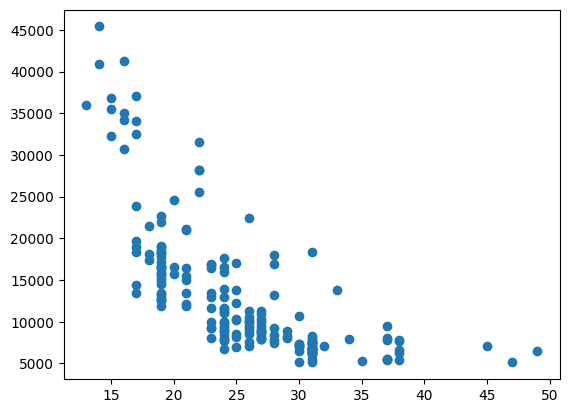

---------------------------------------------------------------------------------------- 

Analysing variable:  highway_mpg


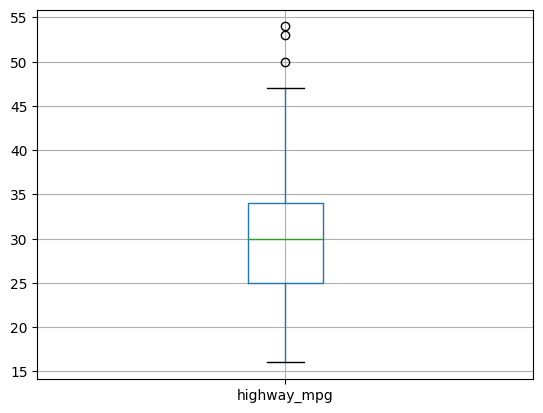

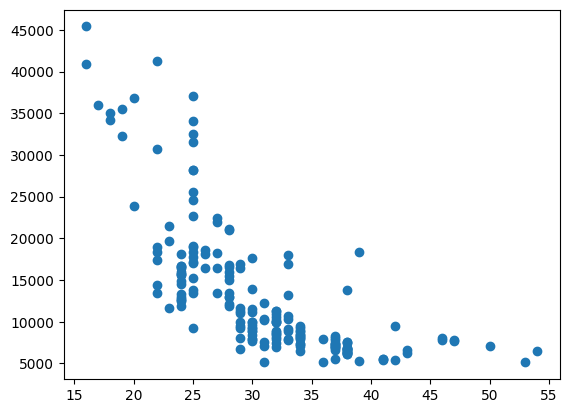

---------------------------------------------------------------------------------------- 

Analysing variable:  price


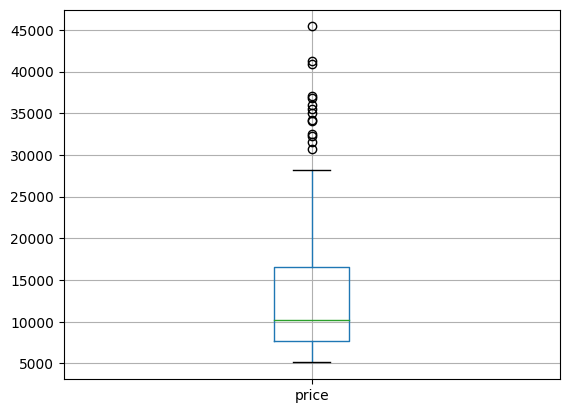

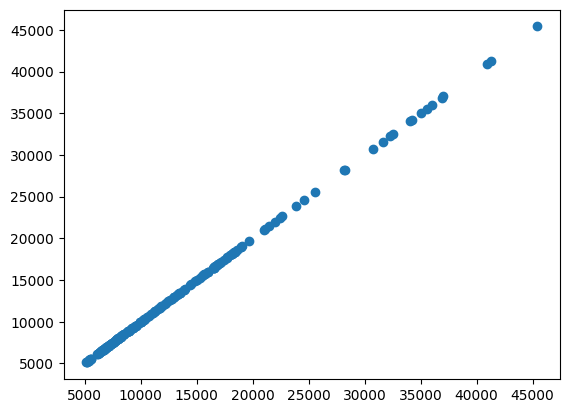

---------------------------------------------------------------------------------------- 



In [72]:
automobile_df_cat_wt_bool = automobile_df_cat_var_enc.select_dtypes(include=['int64', 'float64']).copy()

for var in automobile_df_cat_wt_bool.columns:
    print("Analysing variable: ", var)
    automobile_df_cat_wt_bool.boxplot(column=var)
    plt.show()
    plt.scatter(x = automobile_df_cat_wt_bool[var], y = automobile_df_cat_wt_bool['price'])
    plt.show()
    print("---------------------------------------------------------------------------------------- \n")

Analysing each variable, the following conclusions can be taken:

- symboling: No outliers. No visible relationship.

- num_doors: no outliers. No visible relationship.

- wheel_base: Even though the box plots shows some points above 115 the scatter plot seems to indicate a somehow positive relationship so those points can’t be confidently considered outliers.

- length: No points can’t be confidently considered outliers. Positive relationship.

- width: No points can’t be confidently considered outliers. Positive relationship.

- height: No points can’t be confidently considered outliers. No visible relationship.

- curb_weight: No points can’t be confidently considered outliers. Positive relationship.

- num_cylinders: Only one car with 12 cylinders, not representative. **Remove outlier.**

- engine_size: Even though the box plots shows some points above 200 the scatter plot seems to indicate a somehow positive relationship so those points can’t be confidently considered outliers.

- bore: No points can’t be confidently considered outliers. Slight positive relationship.

- stroke: No points can’t be confidently considered outliers. No visible relationship.

- compression_ratio: No points can’t be confidently considered outliers. No visible relationship.

- horsepower: Even though the box plots shows some points above ~180 the scatter plot seems to indicate a somehow positive relationship so those points can’t be confidently considered outliers.

- peak_rpm: **Remove outliers.**

- city_mpg: Even though the box plots shows some points above 45 the scatter plot seems to indicate a somehow negative relationship so those points can’t be confidently considered outliers.

- highway_mpg: Even though the box plots shows some points above 45 the scatter plot seems to indicate a somehow negative relationship so those points can’t be confidently considered outliers.

In [98]:
def IQR(df: pd.DataFrame, var: str) -> List[int]:
    outliers = []
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(df[var]>=upper)[0]
    outliers.extend(upper_array)
    lower_array = np.where(df[var]<=lower)[0]
    outliers.extend(lower_array)
    return outliers

In [99]:
print("Number of rows before outlier removal: ", len(automobile_df_cat_var_enc.index))

variables_to_remove = ['peak_rpm']
automobile_df_wt_outliers = automobile_df_cat_var_enc.copy()
automobile_df_wt_outliers.reset_index(drop=True,inplace=True)

outliers = []

car_with_12_cylinders = np.where(automobile_df_wt_outliers['num_cylinders']>=12)[0]
outliers.extend(car_with_12_cylinders) 

for var in variables_to_remove:
    outliers.extend(IQR(automobile_df_wt_outliers, var))

print(outliers)
automobile_df_wt_outliers.drop(index=outliers, inplace=True)

print("Number of rows after outlier removal: ", len(automobile_df_wt_outliers.index))

Number of rows before outlier removal:  193
[45, 153, 154]
Number of rows after outlier removal:  190


In [66]:
automobile_df_cat_var_enc.describe(include = "all")

,symboling,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,...,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193,193,193,193,193,193,193,193,193,193
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,141,178,180,182,129,174,192,105,184,192
mean,0.797927,3.160622,98.923834,174.326425,65.893782,53.869948,2561.507772,4.419689,128.124352,3.330622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.235582,0.989583,6.152409,12.478593,2.137795,2.394770,526.700026,1.023182,41.590452,0.272385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,3.000000,61.000000,2.540000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,98.000000,3.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,4.000000,120.000000,3.310000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,4.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,4.000000,146.000000,3.590000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note: Will require feature normalization.

<div class="markdown-google-sans">

## <strong>Feature Engineering and Selection</strong>
</div>

Based on your EDA, engineer new features and select the most relevant ones for your model. Justify your choices.

<div class="markdown-google-sans">

## <strong>Machine Learning Model</strong>
</div>

Build a machine learning model to predict the "price" variable.
Explain your choice of model and any hyperparameters you tune. Use appropriate validation techniques.

<div class="markdown-google-sans">

## <strong>Evaluation and Interpretation</strong>
</div>

Evaluate the performance of your model using appropriate metrics. 
Interpret your model's predictions, and discuss its strengths and weaknesses.